# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

# 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data=pd.read_csv("F:/python7数据分析篇/house_price.csv")
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 评估和清洗数据

我们要从结构和内容评估数据，即整洁度和干净度：整洁度要求每行是一个观察值，每列是一个变量，每个单元格只有一个值；干净度要求不能存在缺失值、重复值、错误数据或无效数据
我们先从结构进行检查，
为了方便清洗数据我们先把`original_dataf`复制为`cleaned_data`

## 数据的整洁度

In [3]:
cleaned_data=original_data.copy()
cleaned_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
185,5110000,3000,3,1,2,yes,no,yes,no,no,0,no,unfurnished
482,2940000,3150,3,1,2,no,no,no,no,no,0,no,unfurnished
251,4515000,3450,3,1,2,yes,no,yes,no,no,1,no,semi-furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished
259,4473000,6360,2,1,1,yes,no,yes,no,yes,1,no,furnished
238,4613000,4510,4,2,2,yes,no,yes,no,no,0,no,semi-furnished
407,3465000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
508,2590000,4400,2,1,1,yes,no,no,no,no,0,no,unfurnished
344,3850000,3850,2,1,1,yes,no,no,no,no,0,no,semi-furnished
327,3990000,6480,3,1,2,no,no,no,no,yes,1,no,semi-furnished


我们发现其结构不存在问题无需检查

## 数据的干净度

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


总共有545组数据，每一个变量都不存在缺失值
我们可以将`furnishingstatus`改为`category`的数据类型，节约内存；
`mainroad`,`guestroom`,`  basement`,`hotwaterheating`,`airconditioning`,`prefarea`改为布尔类型的数据,并进行检查


In [5]:
cleaned_data["furnishingstatus"]=cleaned_data["furnishingstatus"].astype('category')

In [6]:
# 根据下一行代码报错写的（向下转型）
pd.set_option('future.no_silent_downcasting', True)

In [7]:
cleaned_data[ ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]=cleaned_data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes':True,'no':False}).astype(bool)

cleaned_data.info()

In [8]:
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished


### 处理重复值

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

### 处理不一致数据

不一致数据代表一个含义对应两个不同的值，我们需要进行统一

In [9]:
cleaned_data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

### 处理无效或错误数据

In [10]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


据观察不存在脱离现实意义的数据

# 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与房价存在相关性的变量，为后续的进一步分析提供方向。

In [11]:
#将色盘调为`pastel`
sns.set_palette("pastel")

## 房价分布

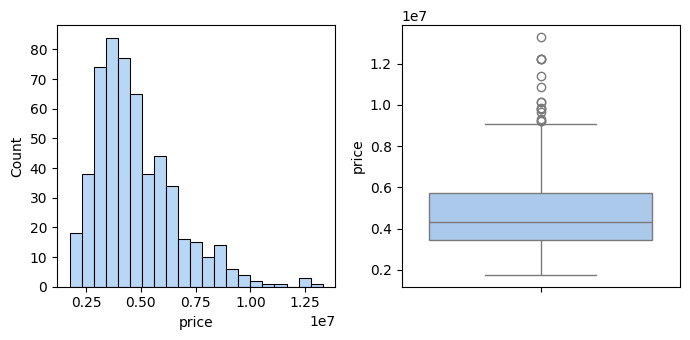

In [12]:
# 设置图形的默认大小
plt.rcParams['figure.figsize']=[7.0,3.5]
#启用自动布局，这可以帮助自动调整子图参数，使之填充整个图像区域
plt.rcParams["figure.autolayout"]=True
# 创建1行2列的子图的图形
figure,axes=plt.subplots(1,2)
#画图
sns.histplot(cleaned_data,x='price',ax=axes[0])
sns.boxplot(cleaned_data,y='price',ax=axes[1])
plt.show()

房价呈右偏态分布，说明数据集中的大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高

## 面积分布

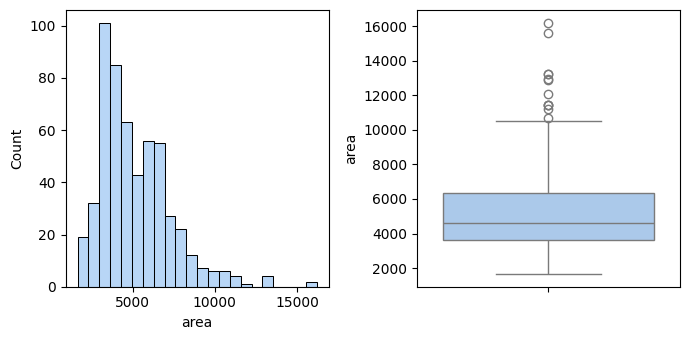

In [13]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='area',ax=axes[0])
sns.boxplot(cleaned_data,y='area',ax=axes[1])
plt.show()

面积分布也呈右偏态分布，与价格相似，说明面积可能与房价之间的关系比较密切

## 房价与面积的关系

<Axes: xlabel='area', ylabel='price'>

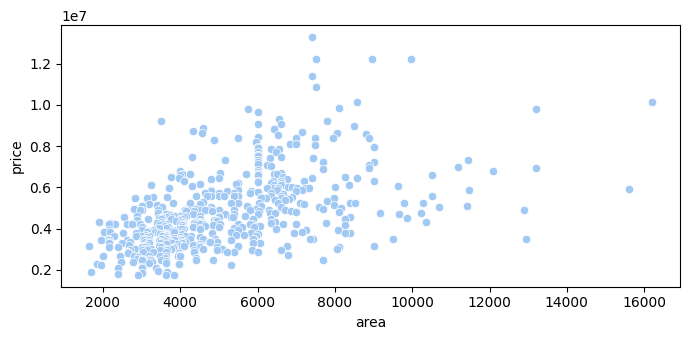

In [14]:
sns.scatterplot(cleaned_data,x="area",y='price')

我们发现面积越小房价越低

## 房价与卧室数量的关系

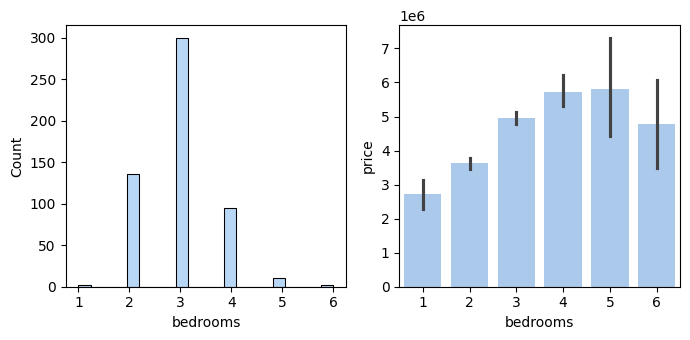

In [15]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='bedrooms',ax=axes[0])
sns.barplot(cleaned_data,x='bedrooms',y='price',ax=axes[1])
plt.show()

大多数房子的卧室数量为3，并且当卧室数量为5时，房子价格最高，一旦到达了6个卧室数量房子价格不一定最高

## 房价与厕所数量的关系

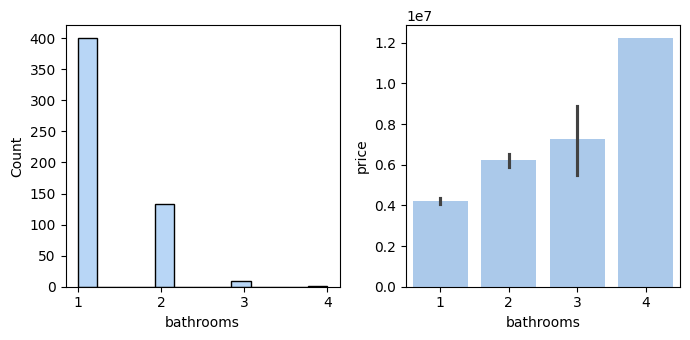

In [16]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='bathrooms',ax=axes[0])
sns.barplot(cleaned_data,x='bathrooms',y='price',ax=axes[1])
plt.show()

大多数房子只有1~2个厕所，并且厕所越多房价数量越高

## 房价与楼层数之间的关系

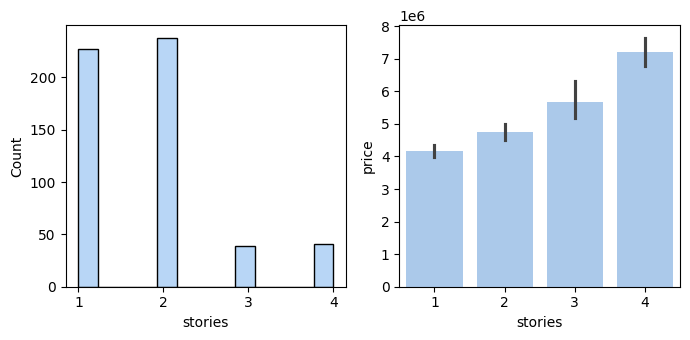

In [17]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='stories',ax=axes[0])
sns.barplot(cleaned_data,x='stories',y='price',ax=axes[1])
plt.show()




发现大部分楼层位于1~2层，且楼层越高价格也越高

## 房价与车库数之间的关系

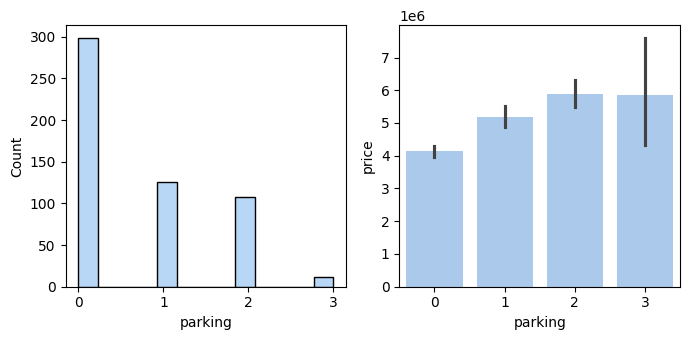

In [18]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='parking',ax=axes[0])
sns.barplot(cleaned_data,x='parking',y='price',ax=axes[1])
plt.show()

大部分房子都没有车库，车库数越多房价也越高，但是一旦超过了2个车库数，房价就不一定高了

## 房价与房子是否位于主路之间的关系

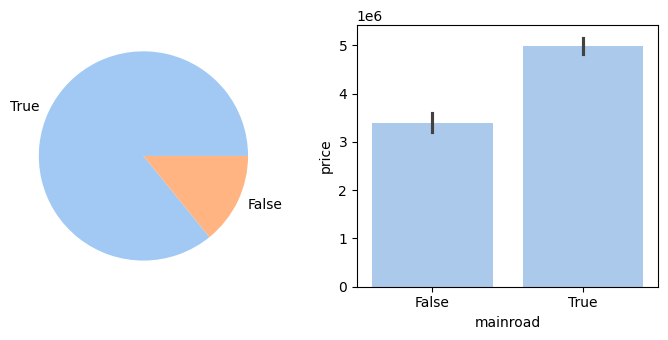

In [19]:
figure,axes=plt.subplots(1,2)
mainroad_count=cleaned_data['mainroad'].value_counts()
mainroad_label=mainroad_count.index
axes[0].pie(mainroad_count,labels=mainroad_label) # 注意`pie`函数只在`matplotlib`库里有，并且不接受ax参数，所以axes[0]只能放在前面替代plt
sns.barplot(cleaned_data,x='mainroad',y='price',ax=axes[1])
plt.show()

位于主路的房子比较多，而且位于主路的房子房价也偏高

## 房价与是否有客房的关系

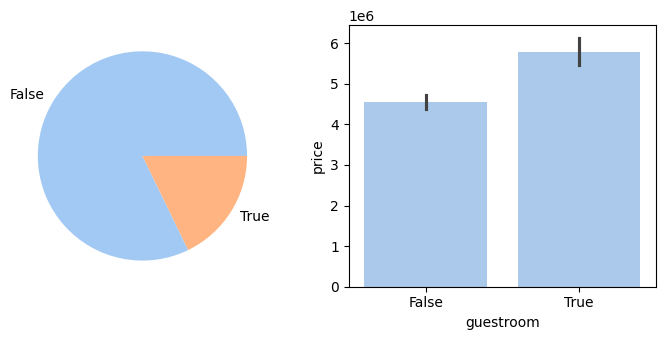

In [20]:
figure,axes=plt.subplots(1,2)
guestroom_count=cleaned_data['guestroom'].value_counts()
guestroom_label=guestroom_count.index
axes[0].pie(guestroom_count,labels=guestroom_label)
sns.barplot(cleaned_data,x='guestroom',y='price',ax=axes[1])
plt.show()

此数据集中房子大部分没有客人房。

从平均房价与楼层数之间的柱状图来看，有客人房的的房子价格也相应高。

## 房价与是否有地下室的关系

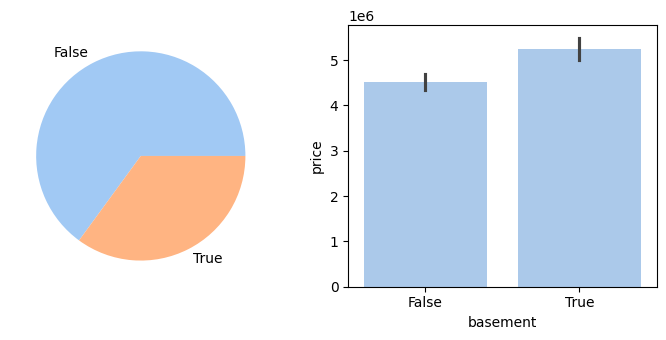

In [21]:
figure,axes=plt.subplots(1,2)
basement_count=cleaned_data['basement'].value_counts()
basement_label=basement_count.index
axes[0].pie(basement_count,labels=basement_label)
sns.barplot(cleaned_data,x='basement',y='price',ax=axes[1])
plt.show()

此数据集中更多的房子没有地下室。

从平均房价与地下室之间的柱状图来看，有地下室的的房子价格也相应高。

## 房价与是否有热水器的关系

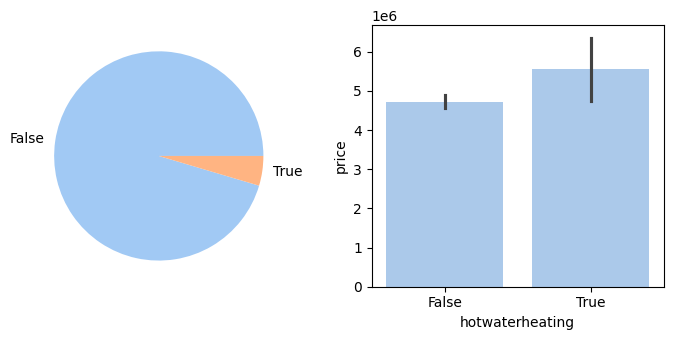

In [22]:
figure,axes=plt.subplots(1,2)
hotwaterheating_count=cleaned_data['hotwaterheating'].value_counts()
hotwaterheating_label=hotwaterheating_count.index
axes[0].pie(hotwaterheating_count,labels=hotwaterheating_label)
sns.barplot(cleaned_data,x='hotwaterheating',y='price',ax=axes[1])
plt.show()

此数据集中房子绝大部分没有热水器。

从平均房价与热水器之间的柱状图来看，有热水器的的房子价格也相应高。

## 房价与是否有空调的关系

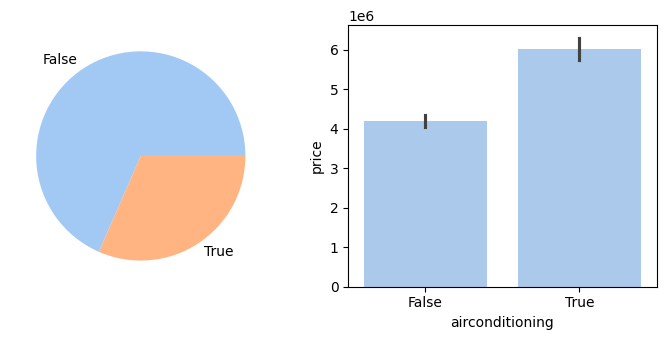

In [23]:
figure,axes=plt.subplots(1,2)
airconditioning_count=cleaned_data['airconditioning'].value_counts()
airconditioning_label=airconditioning_count.index
axes[0].pie(airconditioning_count,labels=airconditioning_label)
sns.barplot(cleaned_data,x="airconditioning",y='price')
plt.show()


此数据集中更多的房子没有空调。

从平均房价与空调之间的柱状图来看，有空调的的房子价格也相应高

## 房价与是否位于首选社区的关系

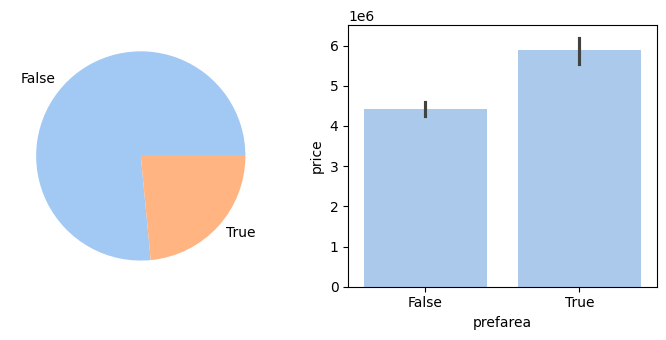

In [24]:
figure,axes=plt.subplots(1,2)
prefarea_count=cleaned_data['prefarea'].value_counts()
prefarea_label=prefarea_count.index
axes[0].pie(prefarea_count,labels=prefarea_label)
sns.barplot(cleaned_data,x='prefarea',y='price')
plt.show()

此数据集中大部分房子不在城市首选社区。

从平均房价与城市首选社区之间的柱状图来看，在城市首选社区的的房子价格也相应高。

## 房价与装修状态的关系

C:\Users\yuran\AppData\Local\Temp\ipykernel_21552\4200880859.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,horizontalalignment='right')


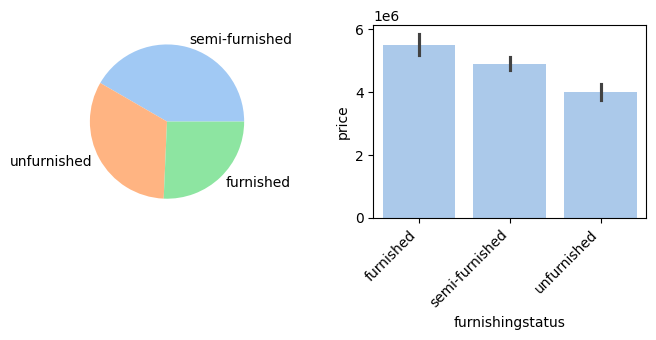

In [25]:
figure,axes=plt.subplots(1,2)
furnishingstatus_count=cleaned_data['furnishingstatus'].value_counts()
furnishingstatus_label=furnishingstatus_count.index
axes[0].pie(furnishingstatus_count,labels=furnishingstatus_label)
sns.barplot(cleaned_data,x='furnishingstatus',y='price',ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

此数据集中简装和毛坯的房子较多，1/4左右房子为精装。

从平均房价与装修状态之间的柱状图来看，精装的房子价格高于简装，简装高于毛坯。

# 分析数据

在分析步骤中，我们将利用`cleaned_data`的数据，进行线性回归分析，目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型。

我们先引入做线性回归所需的模块。

In [26]:
import statsmodels.api as sm

然后可以创建一个新的DataFrame`lr_house_price`，让它作为我们进行线性回归分析所用的数据。

和`cleaned_data`区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在`lr_house_price`上执行。

In [27]:
lr_house_price=cleaned_data.copy()

由于数据里存在分类变量，无法直接建立线性回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该分类。

In [28]:
lr_house_price=pd.get_dummies(lr_house_price,drop_first=True,columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'],dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_True,guestroom_True,basement_True,hotwaterheating_True,airconditioning_True,prefarea_True,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来，我们要把因变量和自变量划分出来。

因变量是`price`变量，因为我们进行线性回归的目的，是得到一个能根据其它可能对房屋价格有影响的变量，来预测销售价格的模型。

In [29]:
y=lr_house_price['price']

我们可以把除价格之外的都纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [30]:
x=lr_house_price.drop('price',axis=1)

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [31]:
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_True,guestroom_True,basement_True,hotwaterheating_True,airconditioning_True,prefarea_True,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_True,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_True,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_True,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_True,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_True,False,False,False,False,False,False,False,False,False,True,False,False,False


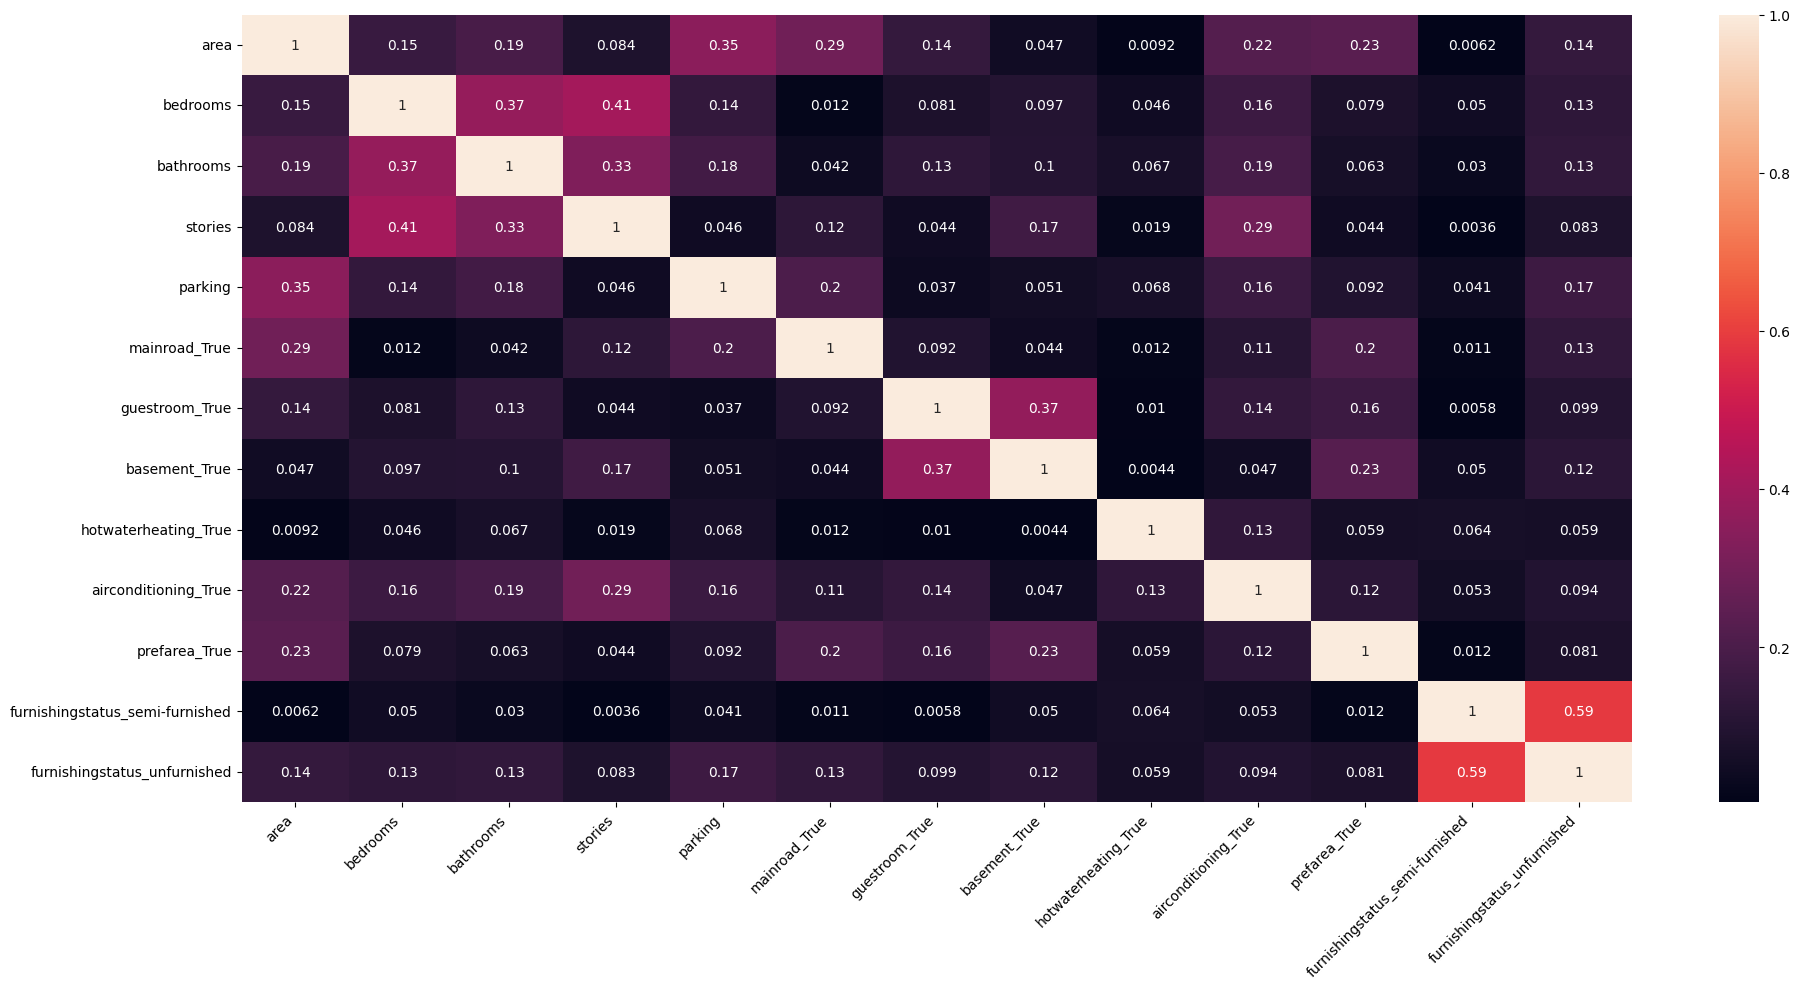

In [32]:
#或者选用热力图来进行筛选大于0.8的相关系数(热力图方法1)
plt.rcParams['figure.figsize']=[20,10]  #或者plt.figure(figsize=(20,10))[但是这个只对当前的图形有效]
sns.heatmap(x.corr().abs(),annot=True)
ax=plt.gca() # 代表获取当前活跃的axes对象（意思为get current pyplot）
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()   

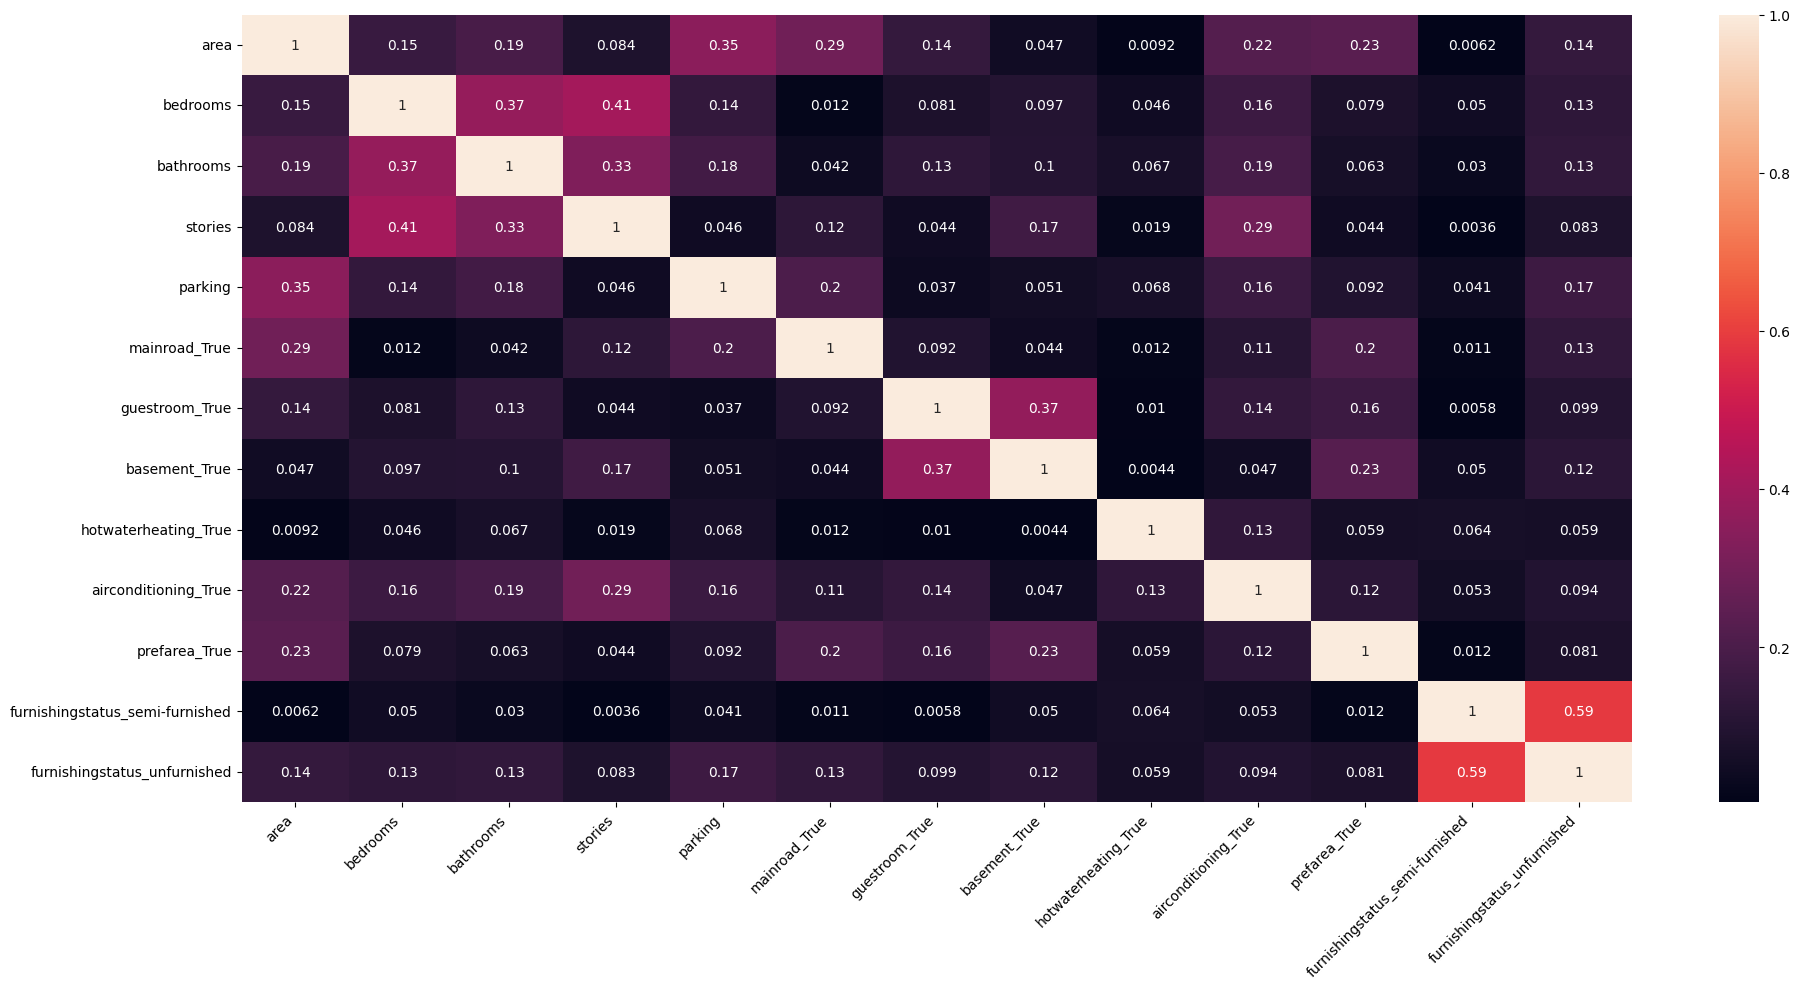

In [33]:
#热力图方法2
figure,ax=plt.subplots(1,1)# 注意这里是ax不是axes
plt.rcParams['figure.figsize']=[20,10]
sns.heatmap(x.corr().abs(),annot=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()   

从以上输出来看，不同变量之间相关系数的绝对值均小于或等于0.8。

接下来，给模型的线性方程添加截距。

In [34]:
x=sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_True,guestroom_True,basement_True,hotwaterheating_True,airconditioning_True,prefarea_True,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以调用OLS函数，利用最小二乘法来得到线性回归模型的参数值

In [35]:
model=sm.OLS(y,x).fit()

为了查看模型结果，我们使用summary方法来获得总结信息

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          9.07e-123
Time:                        17:40:09   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_True                    4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_True                   3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_True                    3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_True             8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_True              8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_True                    6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

可以把这些变量移除后，再次建立线性回归模型。

In [37]:
x= x.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):                        0.00
Time:                        17:40:09   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_True                 4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_True                2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_True                 4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_True          8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_True          8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_True                 6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。

In [38]:
# 要预测房价的房屋的信息：
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修

In [49]:
price_to_predict=pd.DataFrame({'area': [6500], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['False'], 'guestroom': ['False'],
                                 'basement': ['True'], 'hotwaterheating': ['True'],
                                 'airconditioning': ['False'], 'parking': 2, 'prefarea': ['True'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,False,False,True,True,False,2,True,semi-furnished


我们需要把分类变量的类型转换为Category，并且通过categories参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [50]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['False','True'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['False','True'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['False','True'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['False','True'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['False','True'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['False','True'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

下一步，对分类变量引入虚拟变量

In [51]:
price_to_predict=pd.get_dummies(price_to_predict,drop_first=True,
                               columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_True,guestroom_True,basement_True,hotwaterheating_True,airconditioning_True,prefarea_True,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [52]:
price_to_predict= price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

接下来就可以调用线性回归模型的predict方法，获得预测价格

In [53]:
predicted_value=model.predict(price_to_predict)
predicted_value

0    7.303754e+06
dtype: float64

线性回归模型预测的价格为：7303754.